# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 20 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin


class mDBSCAN(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """

    def __init__(self, eps=0.5, min_samples=5):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps = eps
        self.min_pts = min_samples

        return

    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.X_len = len(X)

        # посещен или не посещен объект (0,1)
        self.visited = np.zeros(X.shape[0])
        # индес объекта - кластер
        self.labels = np.zeros(X.shape[0])
        self.labels.fill(-1)
        # количество кластеров
        self.C_count = 0

        # матрица (расстояний)^2 между всеми объектами
        self.distances = (np.square((X[np.newaxis, :] - X[:, np.newaxis]))).sum(axis=2)
        # отноашение объектов к eps окрестностям друг друга исключая сами объекты [ind1, ind2]
        self.eps_distances = np.argwhere(self.distances < self.eps**2)
        self.eps_distances = self.eps_distances[self.eps_distances[:, 0] != self.eps_distances[:, 1]]

        while len(self.visited[self.visited == 0]) > 0:

            # непосещенные индесы
            indexes_notvisited = np.argwhere(self.visited == 0)
            # выбираем произвольный непосещенный объект по индексу

            cur_x_ind = indexes_notvisited[np.random.randint(0, len(indexes_notvisited))]

            # считаем посещенным
            self.visited[cur_x_ind] = 1

            # возвращаем его эпсилон окрестность
            cur_x_nbr = self.neighbours(cur_x_ind)

            # если в эпсилон оекрестности меньше минимума точек то считаем выбросом
            if len(cur_x_nbr) < self.min_pts:
                self.labels[cur_x_ind] = -1
            else:
                # раскрываем кластер
                self.expand_cluster(cur_x_ind, cur_x_nbr)
                self.C_count += 1

        return self

    def neighbours(self, cur_x_ind):
        """
        Возвращает соседей в eps окрестности точки
        """
        
#         cur_dist = self.distances[:, cur_x_ind]
        #nearest_eps_to_cur_x_ind = np.argwhere(self.distances[cur_x_ind,:] < self.eps).ravel()
        
#         print "--------------"
#         print "cur_dist\n"
#         print cur_dist
#         print "nearest_eps_to_cur_x_ind\n"
#         print nearest_eps_to_cur_x_ind
#         print "--------------"
        
        nearest_eps_to_cur_x_ind = self.eps_distances[self.eps_distances[:, 0] == cur_x_ind]
        nearest_eps_to_cur_x_ind = nearest_eps_to_cur_x_ind.transpose()[1]
        
#         self.nnb_test = nearest_eps_to_cur_x_ind
        
        return nearest_eps_to_cur_x_ind

    def expand_cluster(self, cur_x_ind, cur_x_nbr):
        # nbr_all = np.zeros(self.X_len)
        nbr = cur_x_nbr

        ind_nbr = 0
        len_nbr = len(nbr)
        
        while ind_nbr < len_nbr:

            x1_ind = nbr[ind_nbr]

            if self.visited[x1_ind] == 0:

                self.visited[x1_ind] = 1
                nbr1 = self.neighbours(x1_ind)

                if len(nbr1) > self.min_pts:
                    nbr = np.append(nbr, nbr1)
                    len_nbr += nbr1.shape[0]

            if self.labels[x1_ind] == -1:
                self.labels[x1_ind] = self.C_count

            ind_nbr += 1

        return self

    def predict(self, X=None):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

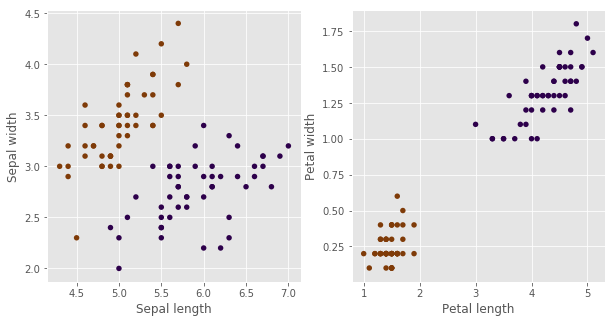

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
from line_profiler import LineProfiler
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

In [11]:
from sklearn import metrics
model = mDBSCAN(eps = 0.8, min_samples=5)
%timeit model.fit(x_iris)
pred_iris = model.predict()
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

100 loops, best of 3: 3.93 ms per loop
Adjusted Rand index for iris is: 1.00


In [10]:
# Сравнение с sklearn
from sklearn import cluster
skmodel = cluster.DBSCAN(eps = 0.8, min_samples=5)
%timeit skmodel.fit(x_iris)
pred_iris = skmodel.fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

The slowest run took 4.07 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 745 µs per loop
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [12]:
## Задание 2
class mSihouette:
    '''
      Sihouette
    ''' 
    
    def c_a(self, x_ind, c_ind):
        
        icl = np.argwhere(self.Y == c_ind)
        
        res = self.distances[x_ind][icl].sum()
        res = res / (icl.shape[0] - 1 )
            
        return res
    
    
    def c_b(self, x_ind, c_ind):
        
        clusters = np.unique(self.Y)
        cl_dst = np.zeros(clusters.shape[0])
#         print "X_ind 2: ", x_ind,"\n"
#         print "C_ind 2: ", c_ind, '\n'
        cl_dst[c_ind] = -1
        for k in np.unique(self.Y):
            k = int(k)
            if k == c_ind:
                continue
                
            nck = np.argwhere(self.Y == k)
#             print "K 1: ", k ,"\n"
            cl_dst[k] = self.distances[x_ind][nck].sum() / nck.shape[0]
#             print "nck_shape: ", nck.shape[0]
#             if k == c_ind:
#                 print  cl_dst[k]
        
        cl_dst = cl_dst[cl_dst >= 0]
#         print cl_dst
        return cl_dst.min()
    

    def quality(self, X, Y):
        """
         Implement quality criterion of your choice
        """
        silh_res = np.zeros(X.shape[0])
        
        self.Y = Y
        self.distances = np.sqrt((np.square((X[np.newaxis, :] - X[:, np.newaxis]))).sum(axis=2))
        
        for x_ind in range(0,X.shape[0]):
            
            c_ind = int(self.Y[x_ind])
#             if c_ind == -1:
#                 continue
#             print "X_ind 1: ", x_ind, "\n"
#             print "C_ind 1: ", c_ind, '\n'
            
            a = self.c_a(x_ind, c_ind)
            b = self.c_b(x_ind, c_ind)
#             print b
        
            silh_res[x_ind] = ( b-a )/ np.max([a,b])
#             if silh_res[x_ind] <= 0:
#             print "AAA", silh_res[x_ind]
            
#         silh_res = silh_res/len(X)
#         print silh_res
        return silh_res

In [13]:
def quality(X, y):
    """
    Implement quality criterion of your choice
    """
    
    silh = mSihouette()
    
    
    return silh.quality(X,y)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

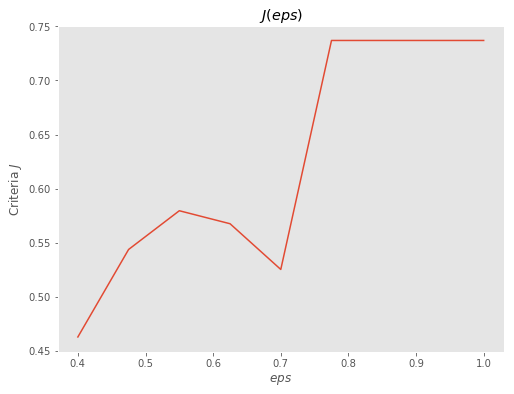

In [14]:
from sklearn import metrics

ks = np.linspace(0.4, 1.0, num=9)

criteria = np.zeros(len(ks))
x = x_iris
for i, k in enumerate(ks):   
    cls = mDBSCAN(eps = k, min_samples=4)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y).mean()
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(eps)$")
pl.ylabel("Criteria $J$")
pl.xlabel("$eps$")
pl.grid()
pl.show()

Из графика видно, что наилучшее значение eps около 0.9

In [15]:
## Задание 3
df = pd.read_csv('WDIData.csv')
df = df.iloc[df.loc[df['Country Name']=='Afghanistan'].index[0]:]

In [26]:
dfi = df[['Country Name', 'Indicator Code', '2008']]
dfi = dfi.set_index(['Country Name', 'Indicator Code'])
dfi = dfi.unstack()
dfi = dfi['2008']

# drop columns with zero std
indx_with_zero_std = np.argwhere((dfi.std() == 0).values == True).ravel()
dfi = dfi.drop(dfi.columns.values[indx_with_zero_std], axis=1)

dfi = dfi.dropna(axis = 1, how='all')

dfi = dfi.fillna(dfi.mean())
# нормализуем данные
dfi = (dfi - dfi.mean())/dfi.std()
# удаляем пстолбцы полностью состоящие из nan
dfi = dfi.dropna(axis = 1, how='any')

# отставляем 80 столбцов с максимальным максимумом, т.е. считаем, 
# что эти столбцы в основном вносят вклад в кластеризацию
# indx_with_small_max = np.argwhere((dfi.max() < dfi.max().nlargest(10).min() ).values == True).ravel()
# dfi = dfi.drop(dfi.columns.values[indx_with_small_max], axis=1)

data = dfi.values

#TRY PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
data = pca.fit_transform(data)

labels = dfi.index.tolist()


Clusters:  2


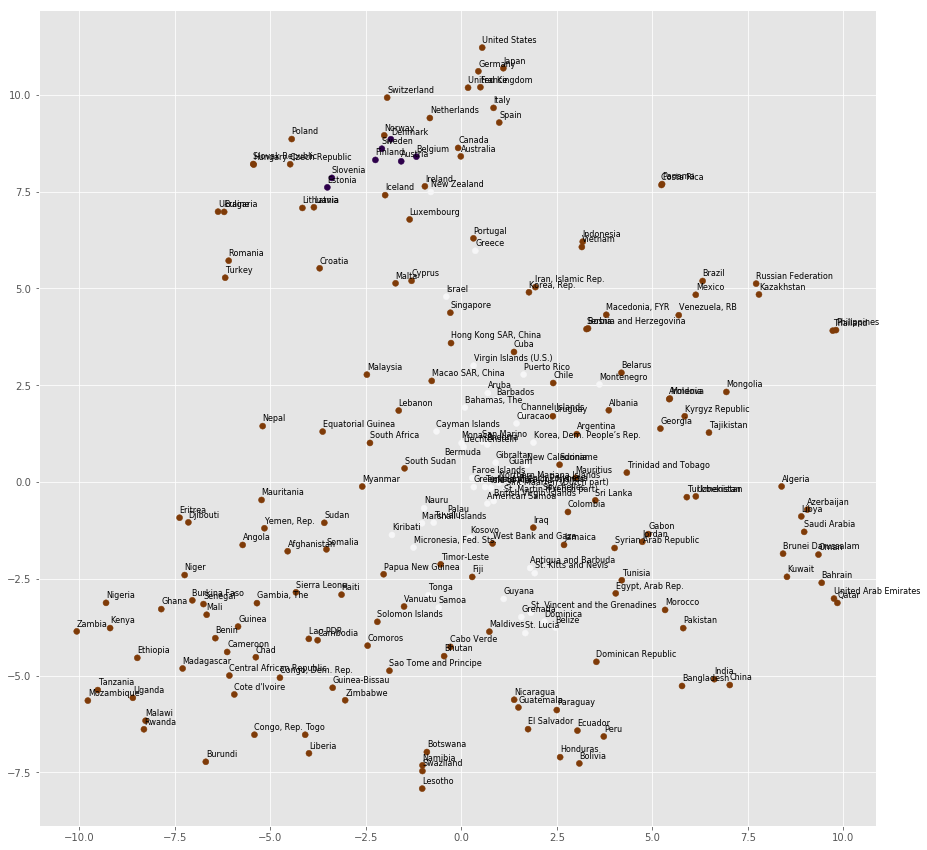

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Gambia, The' 'Georgia' 'Germany'
 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Honduras'
 'Hong Kong SAR, China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran, Islamic Rep.' 'Iraq' 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, Rep.' 'Kuwait' 'Kyrgyz Republic' 'Lao PDR'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembour

In [47]:
cluster = mDBSCAN(eps=18, min_samples=5)

clusters = cluster.fit_predict(data)

print "Clusters: ", cluster.C_count

from sklearn import manifold

embedded = manifold.TSNE(n_components=2, learning_rate=20).fit_transform(data)


plt.figure(figsize=(15, 15))
plt.scatter(embedded[:,0], embedded[:,1], c=clusters, cmap=pl.cm.PuOr)
for i, label in enumerate(labels):
    plt.annotate(str(label).decode("utf8"), xy=embedded[i], xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.show()

nplabels =np.array(labels)
for i in np.unique(np.unique(clusters)):
      print nplabels[np.argwhere(clusters == i).ravel()]

## Задание 4

С данными параметрами получилась следующая кластеризация:

1. Острова ['American Samoa' 'Andorra' 'Antigua and Barbuda' 'Aruba' 'Bahamas, The', ...]
2. Северная европа ['Austria' 'Belgium' 'Denmark' 'Estonia' 'Finland' 'Slovenia' 'Sweden']
3. Все остальные


Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.